The FIFA 19 dataset contains over 18,000 rows with 89 columns. Dataset can be found here - https://www.kaggle.com/karangadiya/fifa19

In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/fifa19/data.csv


# Importing Libraries

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as py
from IPython.display import HTML

Creating the dataframe

In [3]:
df = pd.read_csv('/kaggle/input/fifa19/data.csv')
df.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag',
       'Overall', 'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Special',
       'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Real Face', 'Position',
       'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingT

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

In [5]:
df.describe() #describes all the numeric values in the dataset

,Unnamed: 0,ID,Age,Overall,Potential,Special,International Reputation,Weak Foot,Skill Moves,Jersey Number,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,9103.000000,214298.338606,25.122206,66.238699,71.307299,1597.809908,1.113222,2.947299,2.361308,19.546096,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,5256.052511,29965.244204,4.669943,6.908930,6.136496,272.586016,0.394031,0.660456,0.756164,15.947765,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,0.000000,16.000000,16.000000,46.000000,48.000000,731.000000,1.000000,1.000000,1.000000,1.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4551.500000,200315.500000,21.000000,62.000000,67.000000,1457.000000,1.000000,3.000000,2.000000,8.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,9103.000000,221759.000000,25.000000,66.000000,71.000000,1635.000000,1.000000,3.000000,2.000000,17.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13654.500000,236529.500000,28.000000,71.000000,75.000000,1787.000000,1.000000,3.000000,3.000000,26.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,18206.000000,246620.000000,45.000000,94.000000,95.000000,2346.000000,5.000000,5.000000,5.000000,99.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [6]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [7]:
# No. of unique variables in dataset
df.nunique()

Unnamed: 0        18207
ID                18207
Name              17194
Age                  29
Photo             18207
                  ...  
GKHandling           70
GKKicking            79
GKPositioning        79
GKReflexes           76
Release Clause     1244
Length: 89, dtype: int64

In [8]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

In [9]:
col = [ 'Name', 'Age', 'Nationality',
       'Overall', 'Club', 'Value', 'Potential','Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined',
       'Height', 'Weight', 'Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [10]:
#Creating an updated dataframe with required columns
df = pd.DataFrame(df, columns = col)

In [11]:
df.head()

,Name,Age,Nationality,Overall,Club,Value,Potential,Wage,Preferred Foot,International Reputation,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,L. Messi,31,Argentina,94,FC Barcelona,€110.5M,94,€565K,Left,5.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,Cristiano Ronaldo,33,Portugal,94,Juventus,€77M,94,€405K,Right,5.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,Neymar Jr,26,Brazil,92,Paris Saint-Germain,€118.5M,93,€290K,Right,5.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,De Gea,27,Spain,91,Manchester United,€72M,93,€260K,Right,4.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,K. De Bruyne,27,Belgium,91,Manchester City,€102M,92,€355K,Right,4.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


# Data Visualisation

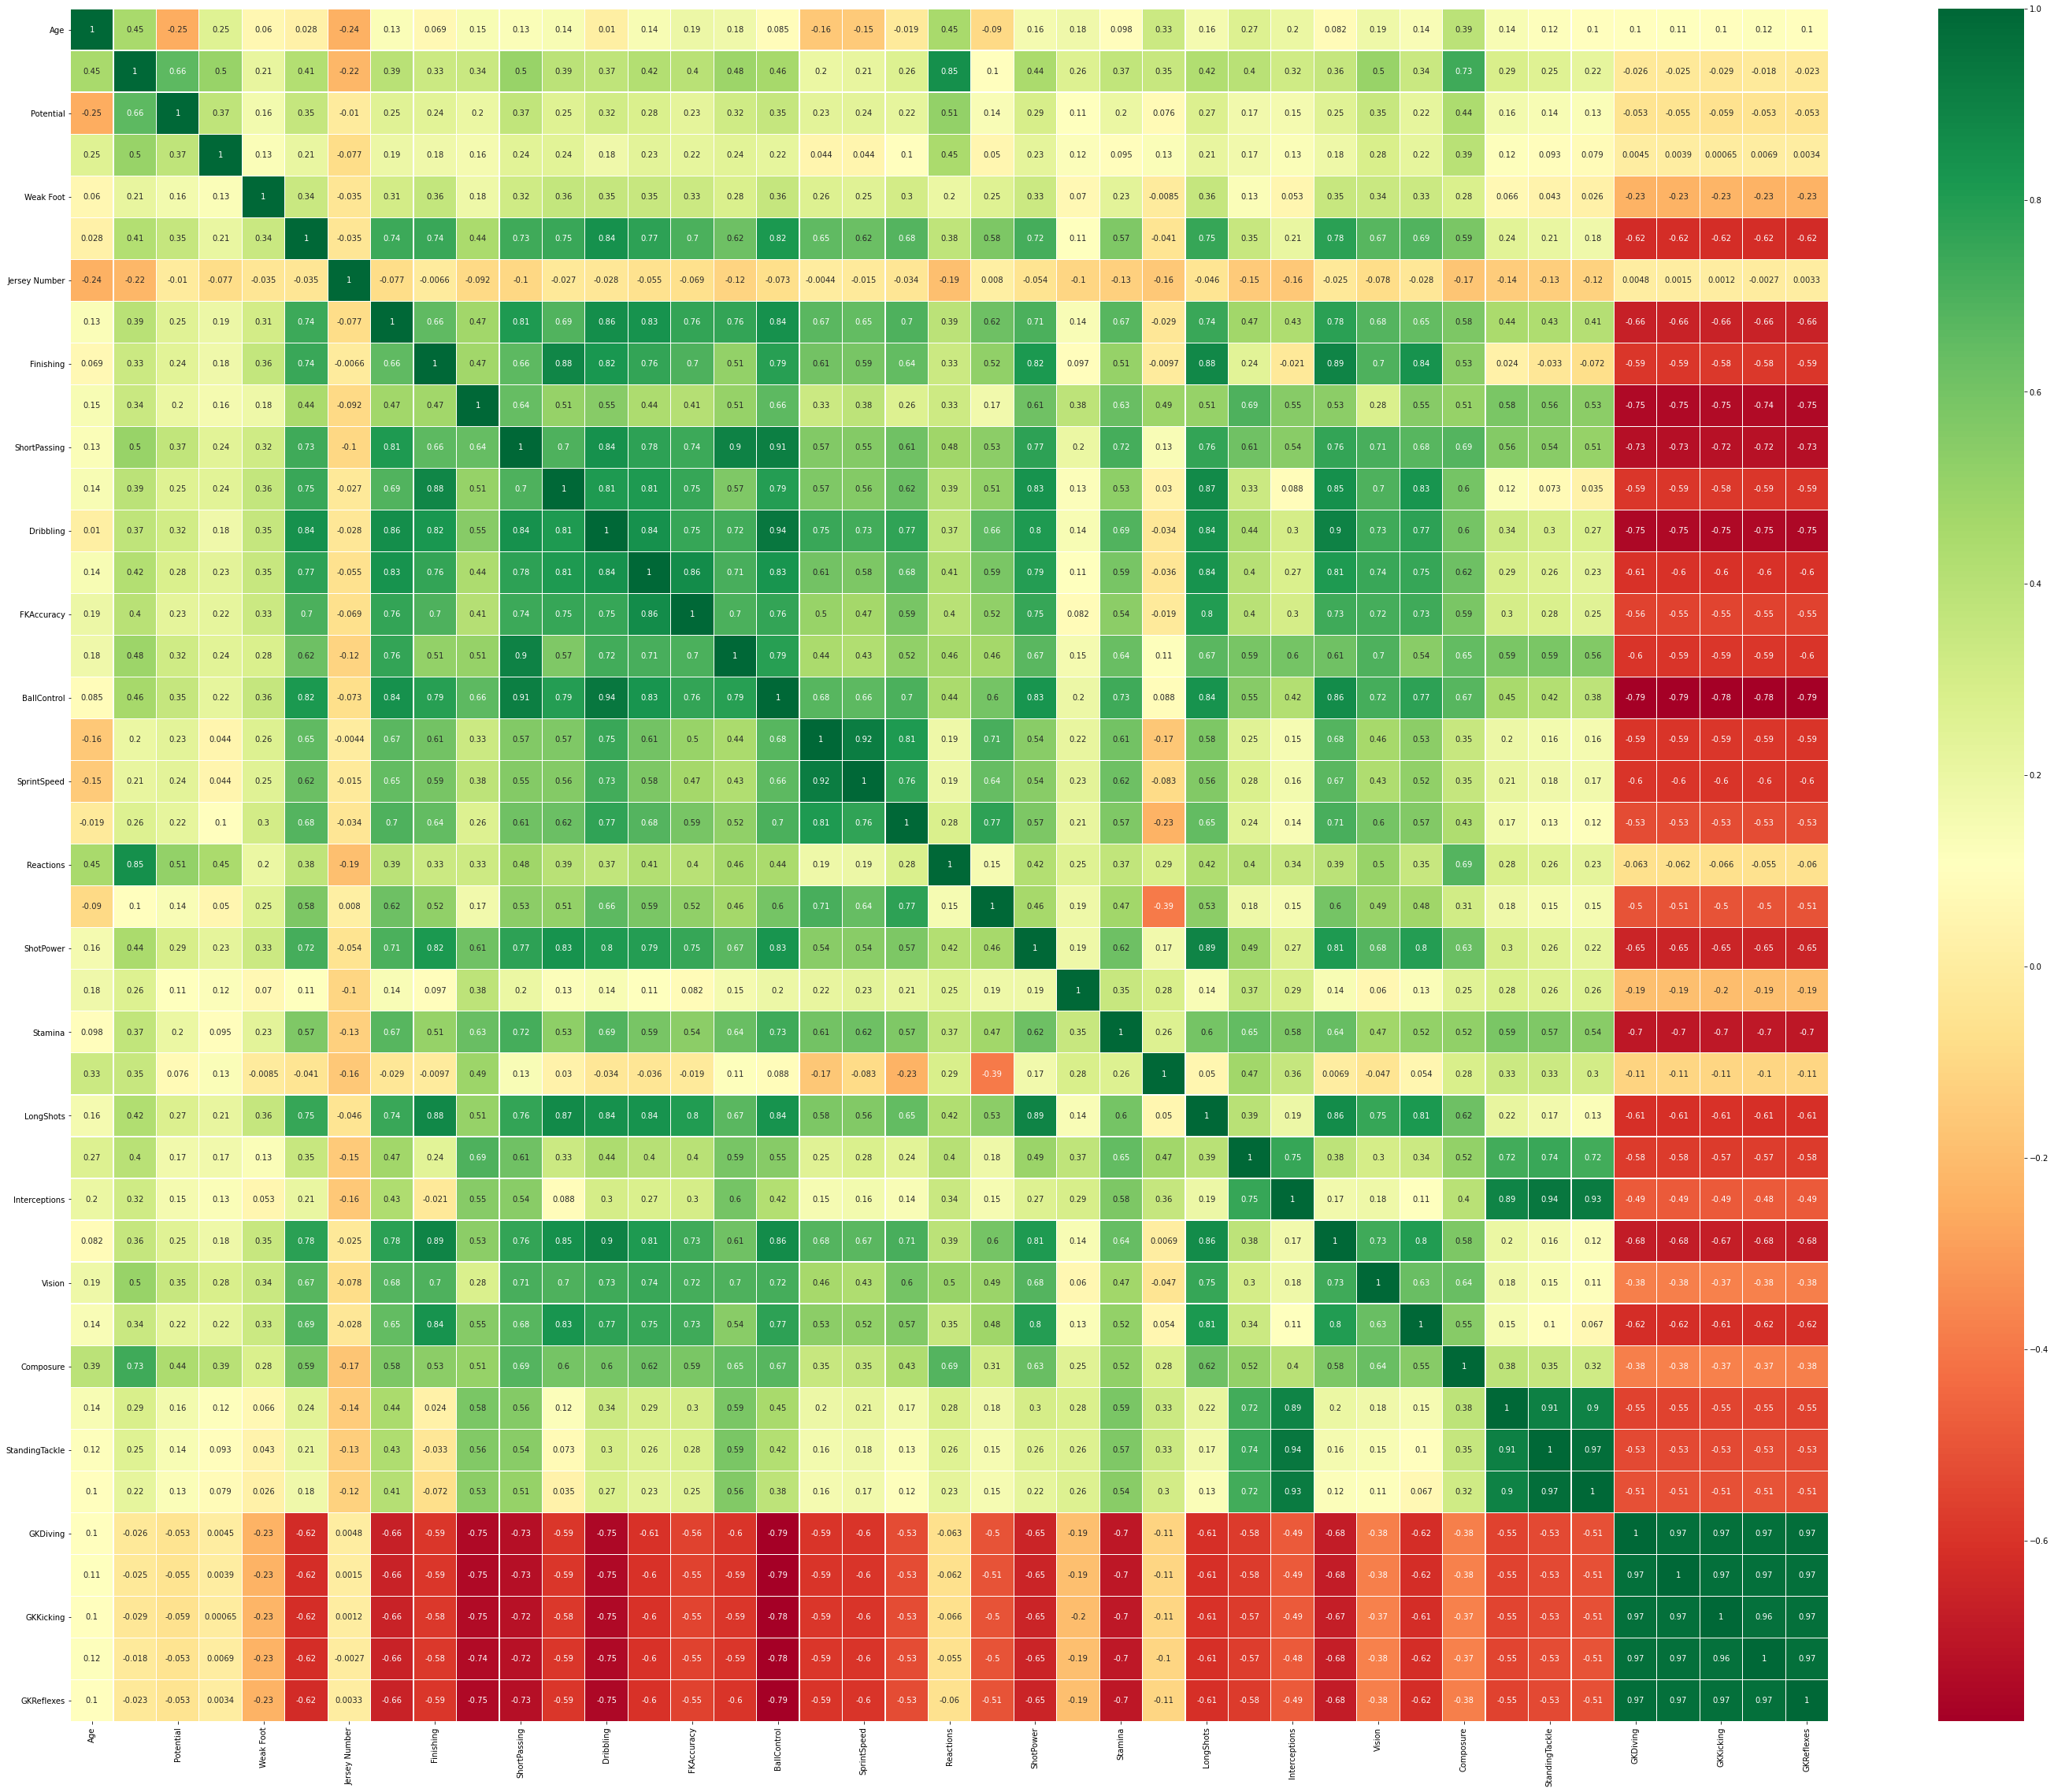

In [12]:
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) #data.corr()-->correlation matrix
fig=plt.gcf()
fig.set_size_inches(50,40)
plt.show()

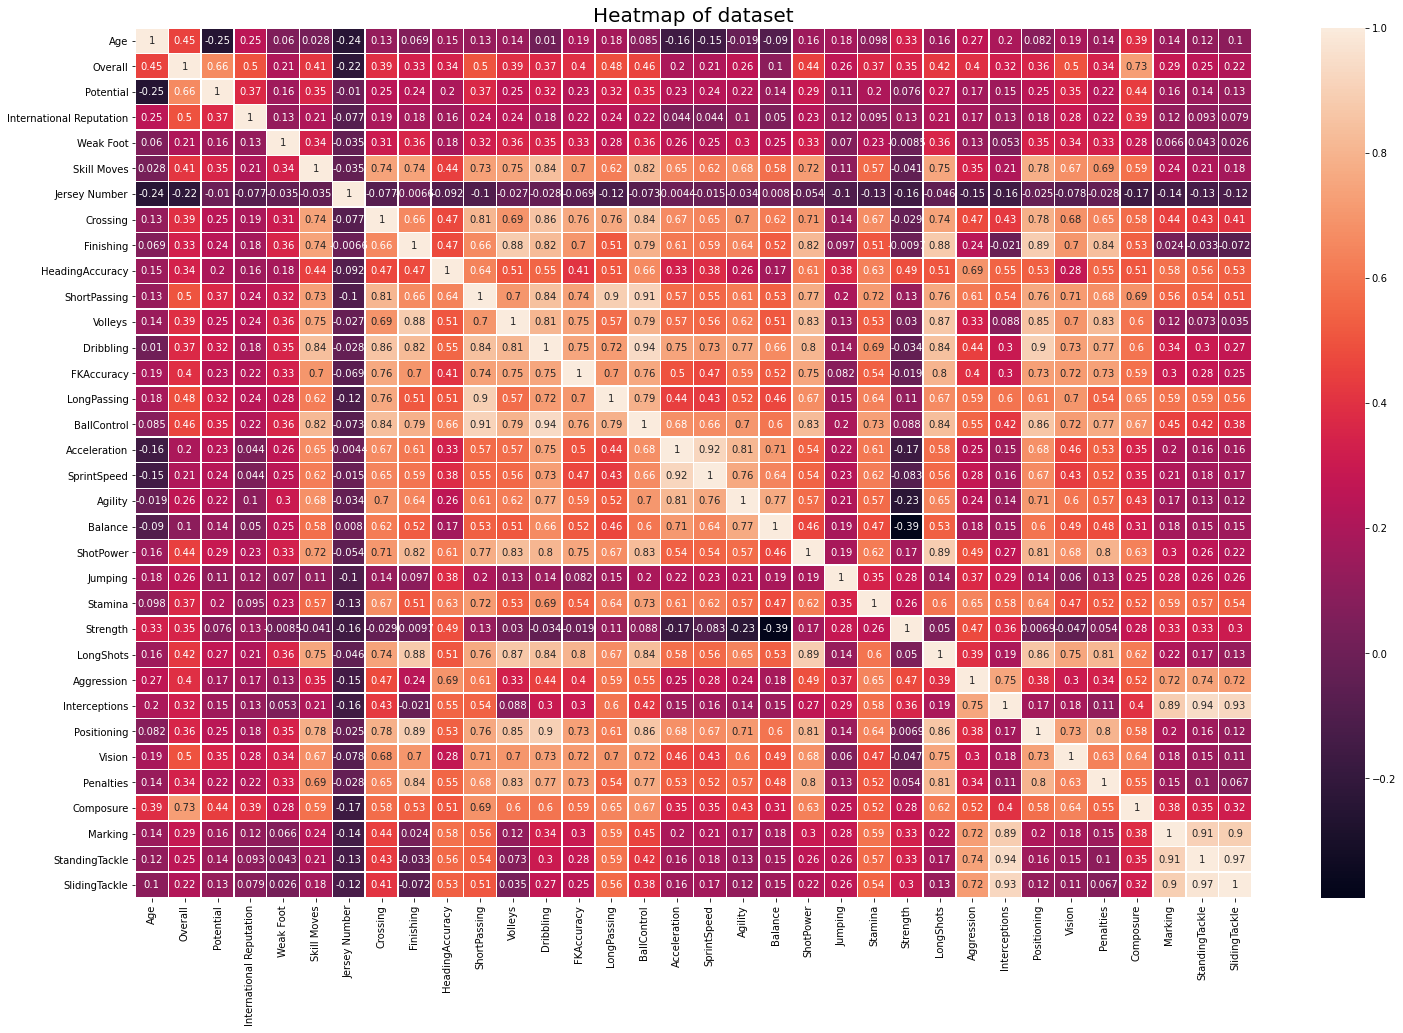

In [13]:
# Correlation heatmap
plt.rcParams['figure.figsize']=(25,16)
hm=sns.heatmap(df[['Name', 'Age',
       'Overall', 'Potential','Wage', 'Preferred Foot', 'International Reputation', 'Weak Foot',
       'Skill Moves', 'Work Rate', 'Body Type', 'Position',
       'Jersey Number', 'Joined',
       'Height', 'Weight', 'Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle']].corr(), annot = True, linewidths=.5)
hm.set_title(label='Heatmap of dataset', fontsize=20)
hm;



In [14]:
df_nations = df.groupby(by='Nationality').size().reset_index()
df_nations.columns = ['Nation', 'Count']

In [15]:
df_nations[(df_nations['Nation'] == 'England') | (df_nations['Nation'] == 'Wales') 
           | (df_nations['Nation'] == 'Scotland') | (df_nations['Nation'] == 'Northern Ireland') ]

,Nation,Count
46,England,1662
114,Northern Ireland,80
131,Scotland,286
161,Wales,129


In [16]:
df_temp = pd.DataFrame(data= [['United Kingdom', 2148]], columns=['Nation', 'Count'])
df_nations = df_nations.append(df_temp, ignore_index=True)
df_nations.tail()

,Nation,Count
160,Venezuela,67
161,Wales,129
162,Zambia,9
163,Zimbabwe,13
164,United Kingdom,2148


Adding values of England, Northern Ireland, Scotland and Wales under United Kingdom as our choropleth map considers the following countries as a whole which is included in the United Kingdom.

Hover over the map to confirm the same.

In [17]:
trace2 = dict(type='choropleth',
              locations=df_nations['Nation'],
              z=df_nations['Count'],
              locationmode='country names',
              colorscale='Portland'
             )

layout = go.Layout(title='<b>Number of Players in each Country</b>',
                   geo=dict(showocean=True,
                            oceancolor='#AEDFDF',
                            projection=dict(type='natural earth'),
                        )
                  )

fig = go.Figure(data=[trace2], layout=layout)
py.iplot(fig)

Top 5 countries are -

Engalnd - 1657
Germany - 1195
Spain - 1071
Argentina - 936
France - 911

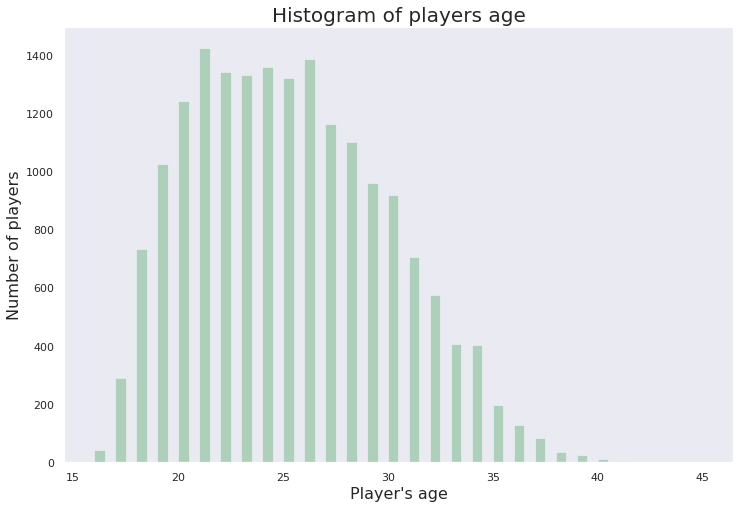

In [18]:
# Histogram: number of players's age
sns.set(style ="dark", color_codes=True)
x = df.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 58, kde = False, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Number of players', fontsize=16)
ax.set_title(label='Histogram of players age', fontsize=20)
plt.show()

Most players age lie in the range of 19 to 29.

In [19]:
df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', nan], dtype=object)

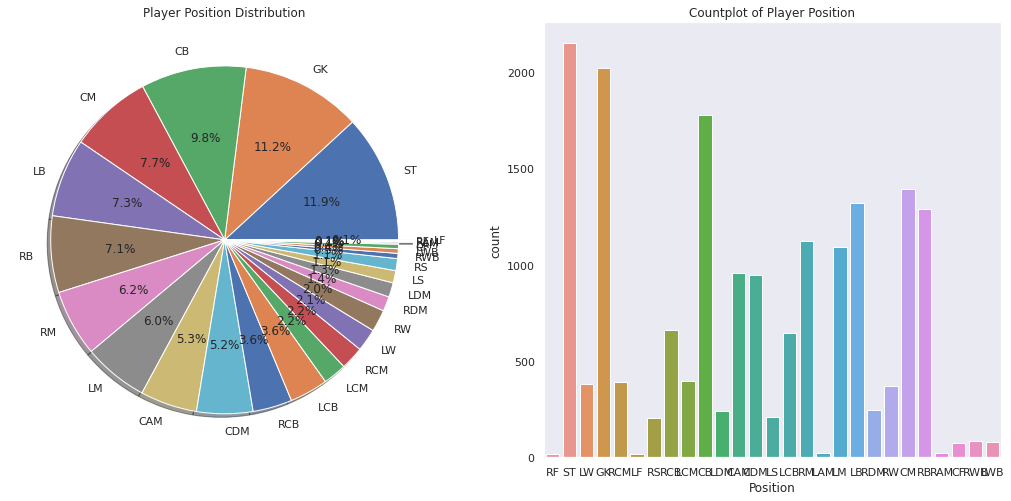

In [20]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Position'].value_counts().plot.pie(explode=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Player Position Distribution')
ax[0].set_ylabel('')
sns.countplot('Position',data=df,ax=ax[1])
ax[1].set_title('Countplot of Player Position')
plt.show()

Positions which leads are:
ST - 11.9%
GK - 11.2%
CB - 9.8%

In [21]:
# The best player per position

display(HTML(df.iloc[df.groupby(df['Position'])['Overall'].idxmax()][['Name', 'Position']].to_html(index=False)))

Name,Position
A. Griezmann,CAM
D. Godín,CB
Sergio Busquets,CDM
Luis Alberto,CF
Thiago,CM
De Gea,GK
J. Rodríguez,LAM
Marcelo,LB
G. Chiellini,LCB
T. Kroos,LCM


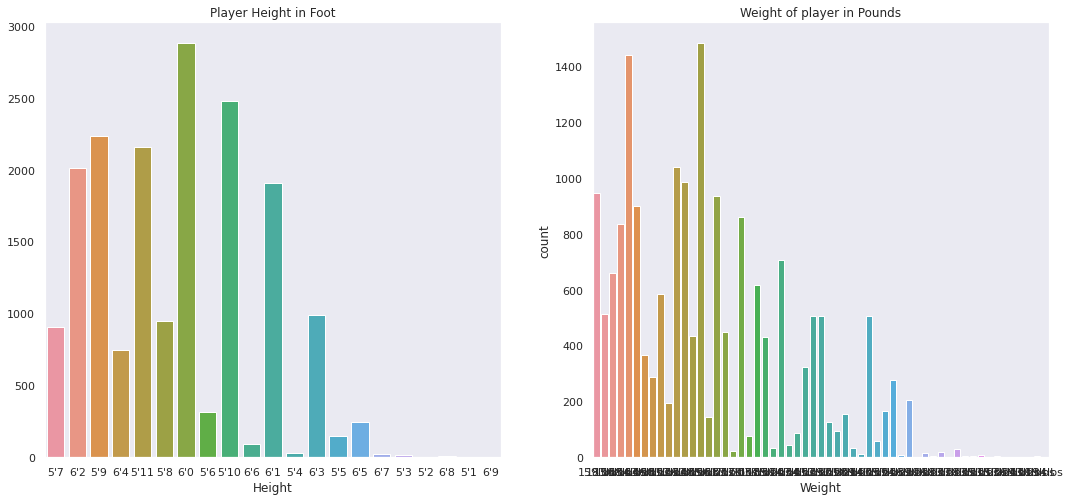

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,8))
sns.countplot('Height', data = df, ax=ax[0])
ax[0].set_title('Player Height in Foot')
ax[0].set_ylabel('')
sns.countplot('Weight',data=df,ax=ax[1])
ax[1].set_title('Weight of player in Pounds')
plt.show()

Most of the players are of height ranging from 5'9" to 6'2"
while the weight ranges between 150lbs to 174lbs.

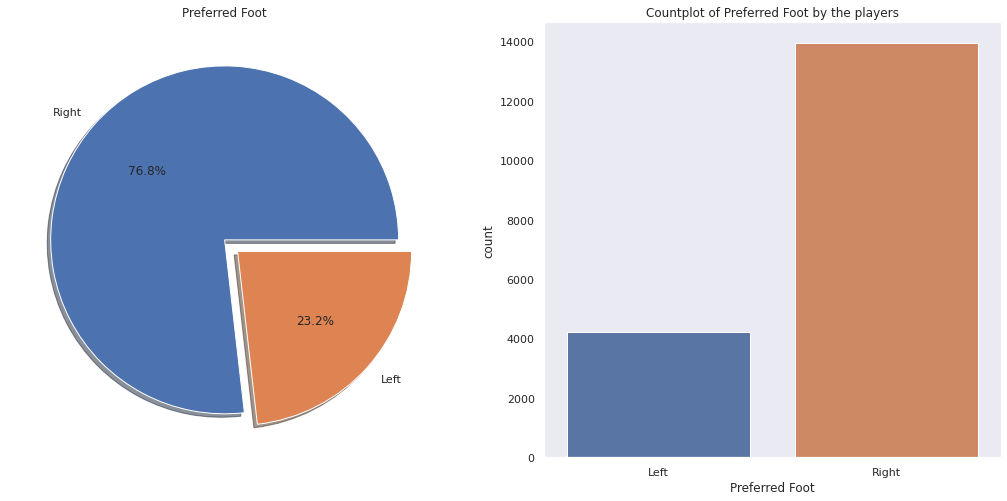

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Preferred Foot'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Preferred Foot')
ax[0].set_ylabel('')
sns.countplot('Preferred Foot',data=df,ax=ax[1])
ax[1].set_title('Countplot of Preferred Foot by the players')
plt.show()

Majority of the players are Right footed.

In [24]:
df['Work Rate'].unique()

array(['Medium/ Medium', 'High/ Low', 'High/ Medium', 'High/ High',
       'Medium/ High', 'Medium/ Low', 'Low/ High', 'Low/ Medium',
       'Low/ Low', nan], dtype=object)

Relation between preferred and work rate:

<Figure size 3600x4320 with 0 Axes>

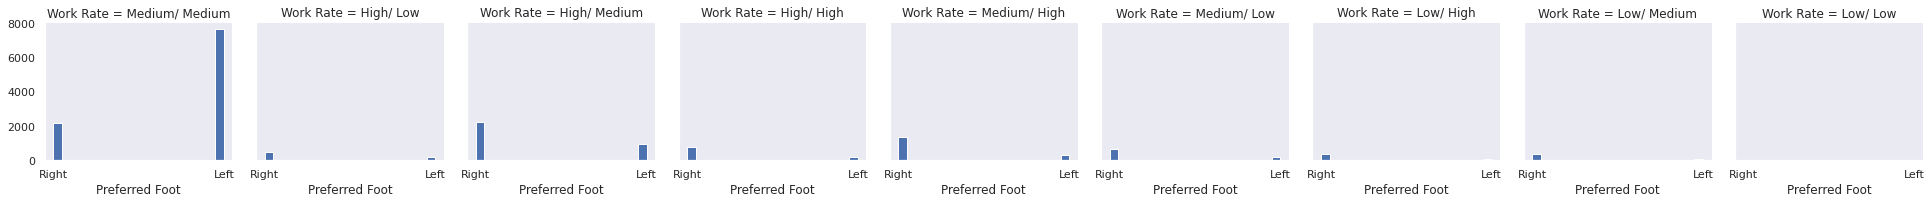

<Figure size 3600x4320 with 0 Axes>

In [25]:
g = sns.FacetGrid(df, col='Work Rate')
g.map(plt.hist, 'Preferred Foot', bins=20)
plt.figure(figsize = (50,60))

In [26]:
# Top five the most expensive clubs
df.groupby(['Club'])['Value'].sum().sort_values(ascending = False).head(5)

Club
Frosinone               €9M€9M€6.5M€6M€7M€4.5M€3.2M€3.6M€875K€4.2M€1.5...
Internacional           €9M€9.5M€9M€5M€6.5M€6M€1.7M€6M€5.5M€4.8M€2.1M€...
Montreal Impact         €9M€8M€6.5M€750K€1.2M€2.7M€1.3M€1M€700K€600K€7...
West Bromwich Albion    €9M€6M€8M€7.5M€6M€7M€6.5M€5.5M€1.3M€3.9M€7M€1....
Changchun Yatai FC      €9M€6.5M€6M€2.1M€850K€825K€700K€725K€450K€375K...
Name: Value, dtype: object

In [27]:
# Top five the less expensive clubs
df.groupby(['Club'])['Value'].sum().sort_values().head(5)

Club
Júbilo Iwata          €0€2.2M€1M€375K€1.1M€850K€825K€200K€550K€290K€...
ESTAC Troyes          €0€725K€1.8M€1.6M€1.4M€1.8M€1.1M€825K€1.6M€775...
SpVgg Unterhaching    €1.1M€1.1M€850K€500K€600K€550K€375K€800K€525K€...
Barnsley              €1.1M€1.2M€1.1M€1.2M€725K€1.2M€1.1M€950K€1.1M€...
Motherwell            €1.1M€1.6M€675K€1M€600K€650K€825K€800K€700K€55...
Name: Value, dtype: object

In [28]:
# Top five teams with the best players
df.groupby(['Club'])['Overall'].max().sort_values(ascending = False).head()

Club
Juventus               94
FC Barcelona           94
Paris Saint-Germain    92
Manchester City        91
Chelsea                91
Name: Overall, dtype: int64

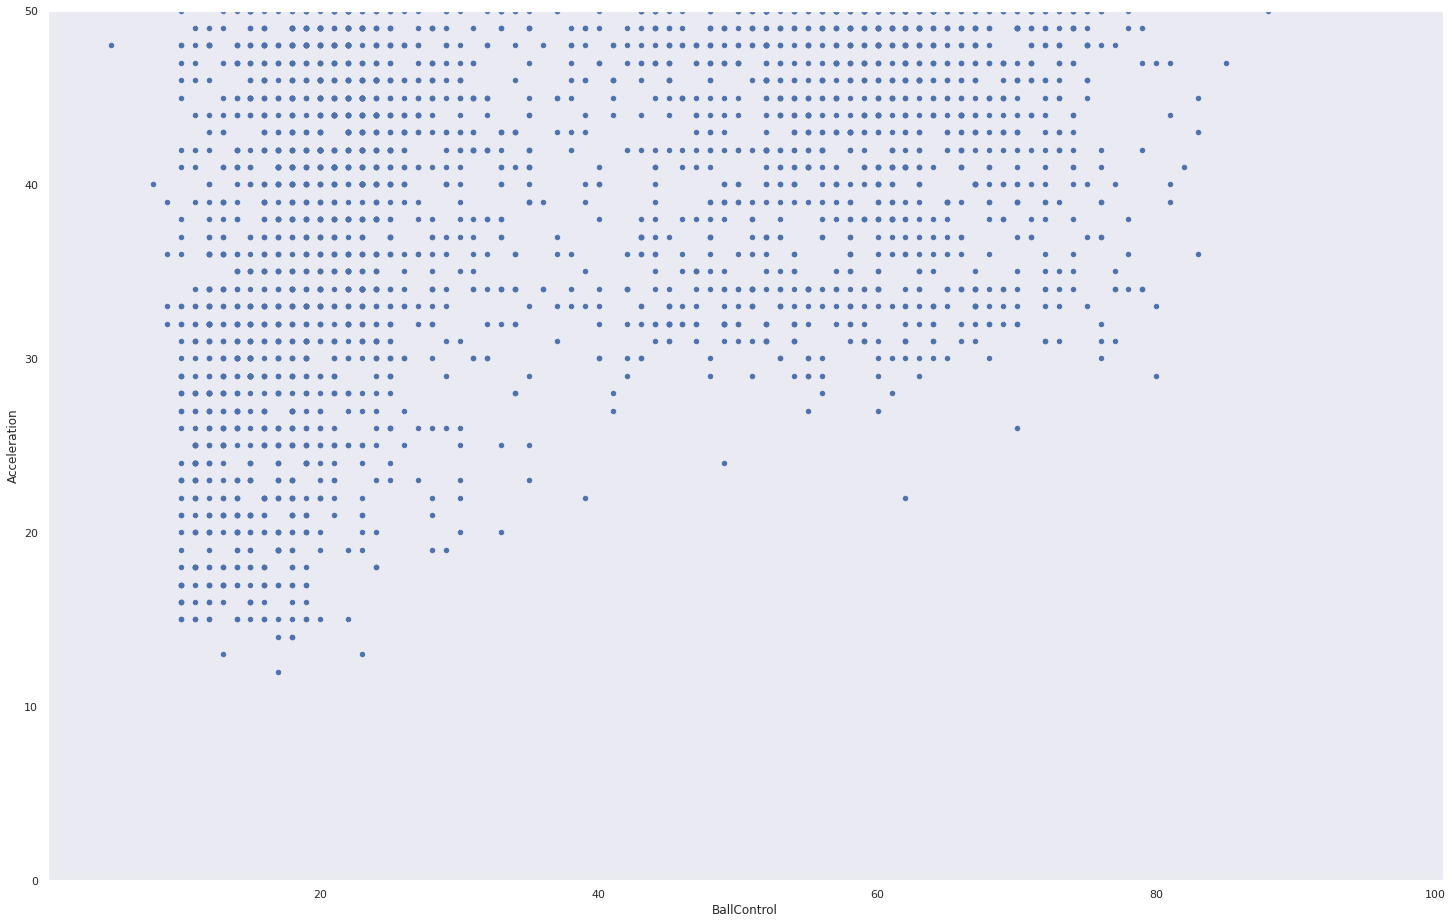

In [29]:
#Scatter plot between Ball Control and Acceleration
data = pd.concat([df['BallControl'], df['Acceleration']], axis=1)
data.plot.scatter(x='BallControl', y='Acceleration', ylim=(0,50));

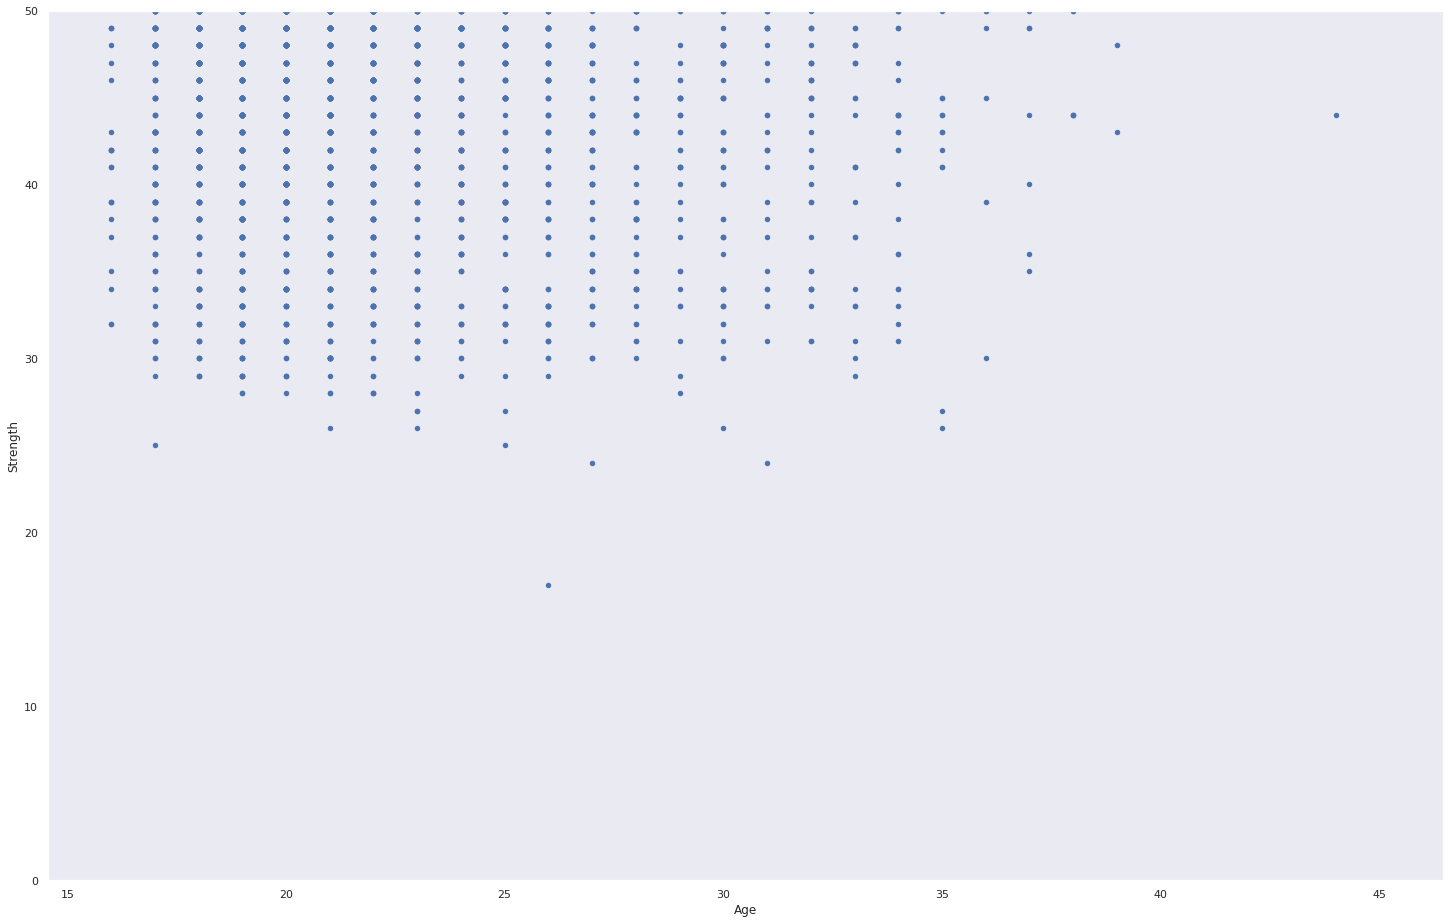

In [30]:
#Scatter plot between Age and Strength
data = pd.concat([df['Age'], df['Strength']], axis=1)
data.plot.scatter(x='Age', y='Strength', ylim=(0,50));

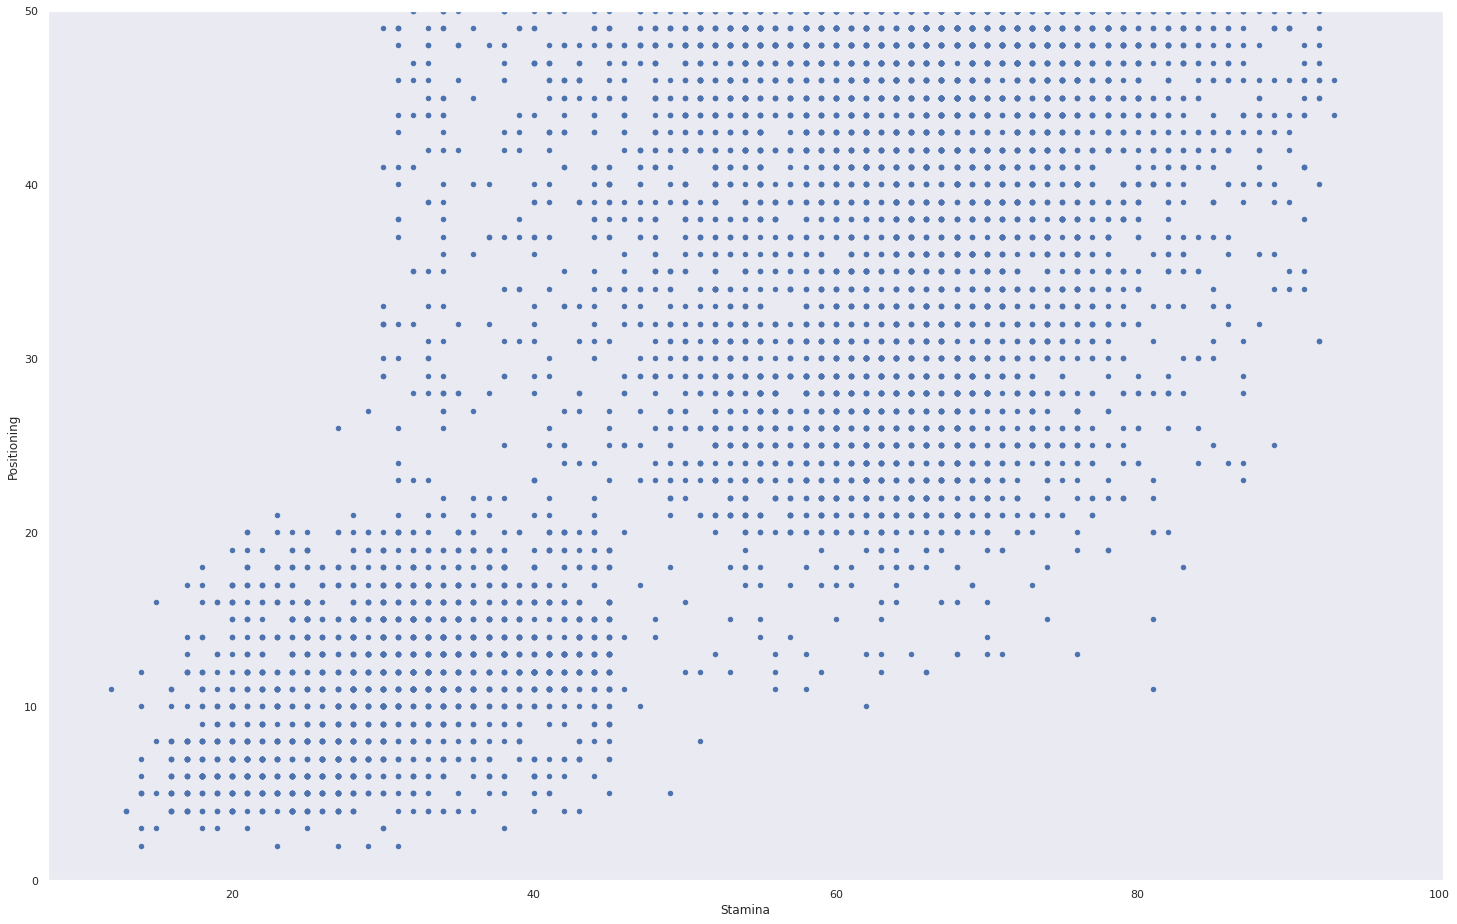

In [31]:
#Scatter plot between Stamina and Positioning
data = pd.concat([df['Stamina'], df['Positioning']], axis=1)
data.plot.scatter(x='Stamina', y='Positioning', ylim=(0,50));

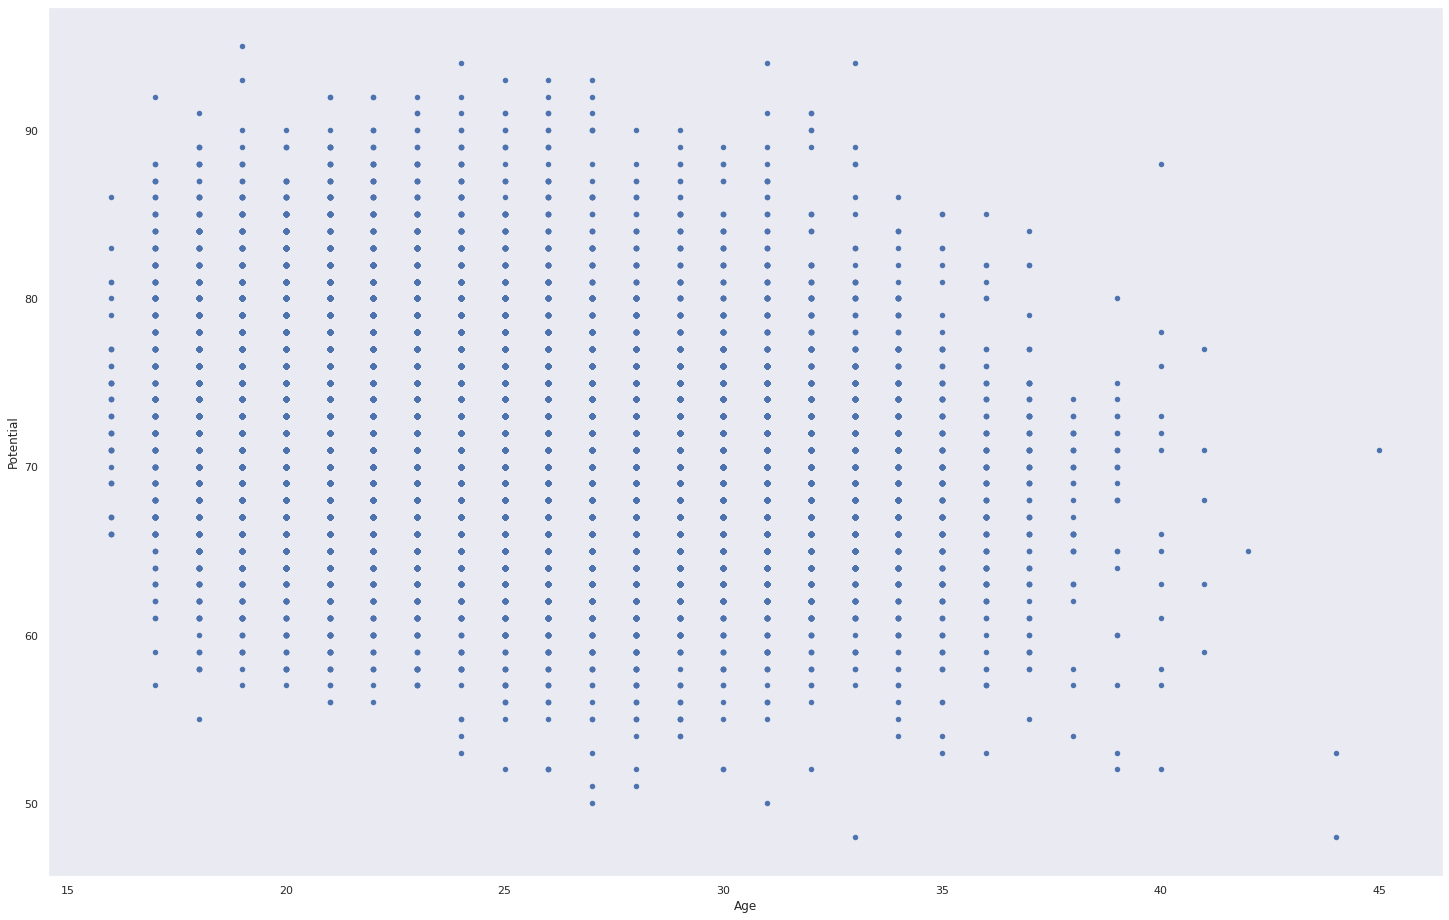

In [32]:
#Scatter plot between Age and Potential
data = pd.concat([df['Age'], df['Potential']], axis=1)
data.plot.scatter(x='Age', y='Potential');

Thank you for reading it till the end. Your feedback is valuable, kindly let me know if there is any kind of changes which can be made to improve the analysis.